# $K-Means Clustering$ - #$Online Retail Store$
- $Online Retail Store$ dataset is from a UK Based and registered non-store online retail. The company sells only uniques all occasion gifts. Many customers of this company are wholesellers.
## Steps of Analysis :
#### STEP 1: Importing and Merging Data
#### STEP 2: Data Cleaning
#### STEP 3: Data Preparation
#### STEP 4: Feature Scaling
#### STEP 5: Data Modelling
#### STEP 6: Find Optimal number of Clusters
  - Method 1 : Elbow Method
  - Method 2 : Finding Silhouette Score
#### Step 7: Fit Final K-Means
#### Step 8: Observation
  - Table
  - Plotting or Visualization

#### Step 1: Importing and Merging Data

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Online+Retail.csv', encoding='ISO-8859-1', header = 0, sep=',')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2: Data Cleaning

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
round(100*(df.isnull().sum())/len(df),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [22]:
df = df.dropna(axis=0)

### Shape of cleaned dataset

In [23]:
print(f"Shape : {df.shape}")

Shape : (406829, 10)


### Step 3: Data Preparation

- R : Recency - No of days since last purchase
- F : Frequency - Number of transactions
- M : Moneytary - Total amount of transactions

##### K-means algorithm will only going to work on int/float type of variables not on object types


#### Checking exsisting columns

In [24]:
df.columns  

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Amount', 'diff'],
      dtype='object')

#### --  Calculate Amount from Quantity and Unit Price

In [9]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


#### Make group_df with Customer_ID as index

In [25]:
grouped_df = df.groupby(['CustomerID'])['Amount'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


### --Calculate frequency and make it as a dataframe with Customer_ID as index

In [11]:
frequency = df.groupby(['CustomerID'])['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID','frequency']
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


####  --Prepare dataframe to calculate Recency

In [26]:
import datetime as dt
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],
                                          format='%d-%m-%Y %H:%M')

In [27]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [28]:
df['diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


### --Calculate Recency

In [30]:
last_purchase = df.groupby(['CustomerID'])['diff'].min()
last_purchase = last_purchase.reset_index()
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


### Merge grouped_df frequency and last_purchase to form requied dataaframe

In [32]:
grouped_df = pd.merge(grouped_df,frequency,on ='CustomerID',how = 'inner')


In [33]:
grouped_df = pd.merge(grouped_df,last_purchase,on ='CustomerID',how = 'inner')
grouped_df

,CustomerID,Amount,frequency,diff
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00
...,...,...,...,...
4367,18280.0,180.60,10,277 days 02:58:00
4368,18281.0,80.82,7,180 days 01:57:00
4369,18282.0,176.60,13,7 days 01:07:00
4370,18283.0,2094.88,756,3 days 00:48:00


In [34]:
grouped_df.columns = ['CustomerID','Amount','frequency','recency']
grouped_df['recency'] = grouped_df['recency'].dt.days
grouped_df.head()

,CustomerID,Amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [ ]:
### Eliminate Outilers

In [35]:
Q1 = grouped_df.frequency.quantile(0.25)
Q3 = grouped_df.frequency.quantile(0.75)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5 * IQR) & (grouped_df.frequency <= Q3 + 1.5 * IQR)]


Q1 = grouped_df.recency.quantile(0.25)
Q3 = grouped_df.recency.quantile(0.75)
IQR = Q3 - Q1
grouped_df.head()


,CustomerID,Amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


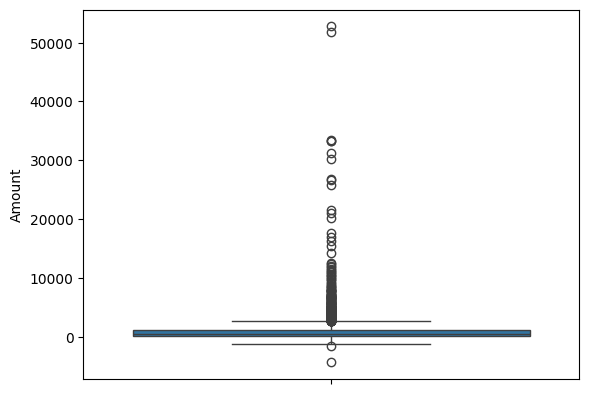

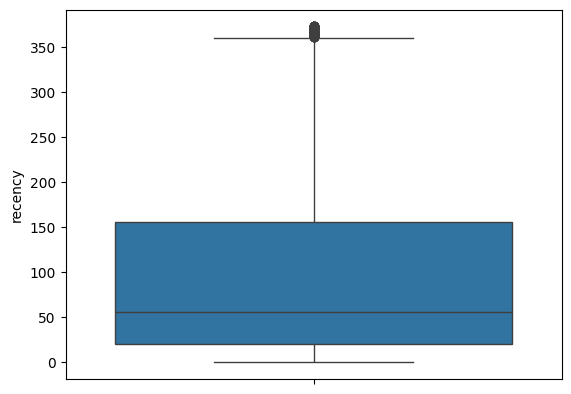

In [44]:
sns.boxplot(grouped_df.Amount)
plt.show()
sns.boxplot(grouped_df.recency)
plt.show()

In [45]:
Q1 = grouped_df.Amount.quantile(0.25)
Q3 = grouped_df.Amount.quantile(0.75)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Amount >= Q1 - 1.5 * IQR) & (grouped_df.Amount <= Q3 + 1.5 * IQR)]
grouped_df.head()

,CustomerID,Amount,frequency,recency
0,12346.0,0.00,2,325
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35


In [46]:
rfm_df = grouped_df[['Amount','frequency','recency']]
rfm_df.head()

,Amount,frequency,recency
0,0.00,2,325
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
5,1545.41,95,35


### Step 4: Scaling of Data (Normalization)

In [47]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[-1.13250972, -1.01047514,  2.12965387],
       [ 1.70626754, -0.37280137, -0.28444922],
       [ 1.64357638,  0.55072616, -0.82305389],
       ...,
       [-1.00485288, -0.90053139,  0.73505249],
       [-0.85356642, -0.76859889, -0.92885124],
       [ 1.76951154,  0.48475991, -0.59222332]])

In [49]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns =['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-1.132510,-1.010475,2.129654
1,1.706268,-0.372801,-0.284449
2,1.643576,0.550726,-0.823054
3,-0.604318,-0.680644,1.975767
4,1.308497,1.034479,-0.659549


### STEP 5: Data Modelling

In [50]:
from sklearn.cluster import KMeans

In [51]:
# Kmeans starts with some arbitary K value

kmean = KMeans(n_clusters = 4, max_iter = 50)
kmean.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

- labels_ :  ndarray of shape (n_samples,)

In [55]:
kmean.labels_

array([3, 0, 0, ..., 3, 1, 0], dtype=int32)

- inertia_ : 

Sum of squared distances of samples to their closest cluster center,weighted by the sample weights if provided.

## STEP 6: Find Optimal number of Clusters
### Method 1: Elbow Method

[6201.84826158784, 3807.0863962956864, 3045.537287777406, 2568.010356440236, 2252.7120096171675, 1984.8501074337796, 1810.2713562390702]


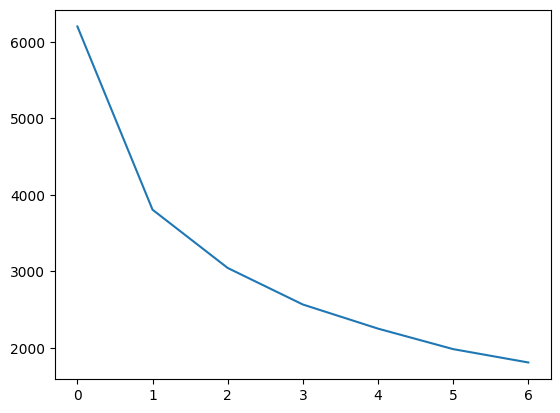

In [54]:
range_n_clusters = [2,3,4,5,6,7,8]

ssd = []

for num_cluster in range_n_clusters:
    
    kmeans = KMeans(n_clusters = num_cluster, max_iter =50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
print(ssd)
plt.plot(ssd)

### Method 2: Silhouette Score

In [60]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_df_scaled)
    score = silhouette_score(rfm_df_scaled, kmeans.labels_)
    print(f'k={k}, Silhouette Score={score:.4f}')

k=2, Silhouette Score=0.4247
k=3, Silhouette Score=0.4331
k=4, Silhouette Score=0.3852
k=5, Silhouette Score=0.3861
k=6, Silhouette Score=0.3561
k=7, Silhouette Score=0.3310
k=8, Silhouette Score=0.3384
k=9, Silhouette Score=0.3431
k=10, Silhouette Score=0.3172


### Highest Silhouette Score of cluster k=3 , Score = 0.4331

### STEP 7 : Fit Final KMeans
- ### Repeat analysis with selected k value, here k =3

In [64]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_df_scaled['Cluster'] = kmeans.fit_predict(rfm_df_scaled)

- ### Assign Clusters to Your Data

In [67]:
rfm_df_scaled['Cluster'] = kmeans.labels_
rfm_df_scaled.head()

,Amount,Frequency,Recency,Cluster
0,-1.132510,-1.010475,2.129654,2
1,1.706268,-0.372801,-0.284449,1
2,1.643576,0.550726,-0.823054,1
3,-0.604318,-0.680644,1.975767,2
4,1.308497,1.034479,-0.659549,1


- ### Analyse Cluster Profile

In [70]:
cluster_profile = rfm_df_scaled.groupby('Cluster').mean().round(2)
cluster_profile

,Amount,Frequency,Recency
Cluster,,,
0,-0.30,-0.32,-0.49
1,1.41,1.42,-0.57
2,-0.63,-0.60,1.47


## Observation:
- #### Classification of Number of Customers : 3 Clusters

In [77]:
Number_of_cust = rfm_df_scaled['Cluster'].value_counts().reset_index()
Number_of_cust.columns = ['Cluster', 'Number of Customers']
Number_of_cust

,Cluster,Number of Customers
0,0,1888
1,2,955
2,1,824


- ### K-Means : $Data-Visualization$

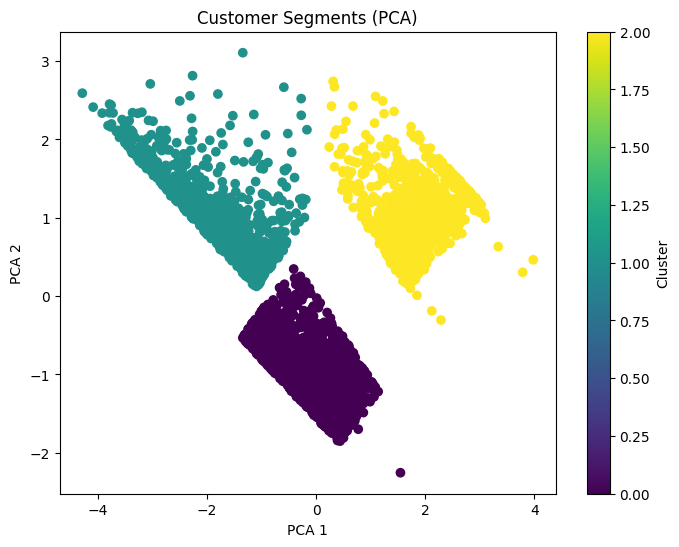

In [76]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_df_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=rfm_df_scaled['Cluster'], cmap='viridis')
plt.title('Customer Segments (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()
